In [30]:
import pandas as pd
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Read in all merged csv data files
path = r'../data/curated/merged_dataset/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

merged_df = pd.concat(li, axis=0, ignore_index=True)
merged_df.drop(['address', 'latitude', 'longitude', 'postcode', 'sa2_2016'], axis=1, inplace=True)

print(merged_df.columns)
#pd.get_dummies(merged_df['sa2_2021'])
merged_df.rename({'gdp(USD Millioins)': 'gdp', 'saving_rate(% of GDP)': 'saving_rate'}, axis=1, inplace=True)
merged_df = pd.get_dummies(data=merged_df, columns=['sa2_2021'], prefix='sa2')
merged_df = pd.get_dummies(data=merged_df, columns=['residence_type'], prefix='resiType') 
#merged_df = pd.get_dummies(data=merged_df, columns=['nbed'], prefix='nbed')
#merged_df = pd.get_dummies(data=merged_df, columns=['nbath'], prefix='nbath')
#merged_df = pd.get_dummies(data=merged_df, columns=['ncar'], prefix='ncar')
#merged_df.drop(['sa2_2021', 'residence_type'], axis=1, inplace=True)
merged_df.dropna(inplace=True)

y = merged_df['weekly_rent']
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(merged_df.isna().sum())
X =  merged_df.loc[:, merged_df.columns != 'weekly_rent']
merged_df    

Index(['year', 'sa2_2021', 'residence_type', 'nbed', 'nbath', 'ncar',
       'min_distance_to_cbd', 'min_distance_to_park', 'min_distance_to_prim',
       'min_distance_to_second', 'min_distance_to_train',
       'min_distance_to_hosp', 'min_distance_to_poli', 'min_distance_to_shop',
       'weekly_rent', 'gdp(USD Millioins)', 'saving_rate(% of GDP)',
       'income_per_person', 'population_density', 'crime_cases'],
      dtype='object')


,year,nbed,nbath,ncar,min_distance_to_cbd,min_distance_to_park,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,...,sa2_217031473,sa2_217031474,sa2_217031475,sa2_217031476,sa2_217041477,sa2_217041478,sa2_217041479,sa2_217041480,resiType_Apartment,resiType_House
0,2013,2.0,1.0,0,227.97163,23.16035,7.35747,16.96507,35.56825,21.35025,...,0,0,0,0,0,0,0,0,0,1
1,2013,2.0,1.0,0,223.66084,5.71742,6.50536,6.76794,7.54355,7.42972,...,0,0,0,0,0,0,0,0,0,1
2,2013,2.0,1.0,0,243.25680,5.11222,0.20027,36.72106,50.85341,36.63541,...,0,0,0,0,0,0,0,0,0,1
3,2013,4.0,2.0,0,140.35827,78.32509,10.66523,11.91899,11.26906,177.44731,...,0,0,0,0,0,0,0,0,0,1
4,2013,1.0,1.0,0,13.86135,0.93250,1.32931,3.49174,2.20800,177.44731,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172030,2022,3.0,1.0,1,293.28053,0.56012,1.21809,114.77016,90.08591,140.56888,...,0,0,0,0,0,0,0,0,0,1
172031,2022,3.0,2.0,2,258.29111,3.49087,5.08707,3.60570,8.37185,2.60312,...,0,0,0,0,0,0,1,0,0,1
172032,2022,2.0,2.0,1,9.47077,2.45011,1.33931,1.62322,3.63291,140.56888,...,0,0,0,0,0,0,0,0,0,1
172033,2022,1.0,1.0,1,1.84933,0.65199,1.10438,1.27940,1.87840,140.56888,...,0,0,0,0,0,0,0,0,1,0


In [50]:
X

,year,nbed,nbath,ncar,min_distance_to_cbd,min_distance_to_park,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,...,sa2_217031473,sa2_217031474,sa2_217031475,sa2_217031476,sa2_217041477,sa2_217041478,sa2_217041479,sa2_217041480,resiType_Apartment,resiType_House
0,2013,2.0,1.0,0,227.97163,23.16035,7.35747,16.96507,35.56825,21.35025,...,0,0,0,0,0,0,0,0,0,1
1,2013,2.0,1.0,0,223.66084,5.71742,6.50536,6.76794,7.54355,7.42972,...,0,0,0,0,0,0,0,0,0,1
2,2013,2.0,1.0,0,243.25680,5.11222,0.20027,36.72106,50.85341,36.63541,...,0,0,0,0,0,0,0,0,0,1
3,2013,4.0,2.0,0,140.35827,78.32509,10.66523,11.91899,11.26906,177.44731,...,0,0,0,0,0,0,0,0,0,1
4,2013,1.0,1.0,0,13.86135,0.93250,1.32931,3.49174,2.20800,177.44731,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172030,2022,3.0,1.0,1,293.28053,0.56012,1.21809,114.77016,90.08591,140.56888,...,0,0,0,0,0,0,0,0,0,1
172031,2022,3.0,2.0,2,258.29111,3.49087,5.08707,3.60570,8.37185,2.60312,...,0,0,0,0,0,0,1,0,0,1
172032,2022,2.0,2.0,1,9.47077,2.45011,1.33931,1.62322,3.63291,140.56888,...,0,0,0,0,0,0,0,0,0,1
172033,2022,1.0,1.0,1,1.84933,0.65199,1.10438,1.27940,1.87840,140.56888,...,0,0,0,0,0,0,0,0,1,0


In [51]:
len(merged_df.loc[merged_df['year'] == 2022])

53696

In [52]:
# holdout method to split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [53]:
# build XGBoost regression model
# https://machinelearningmastery.com/xgboost-for-regression/
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

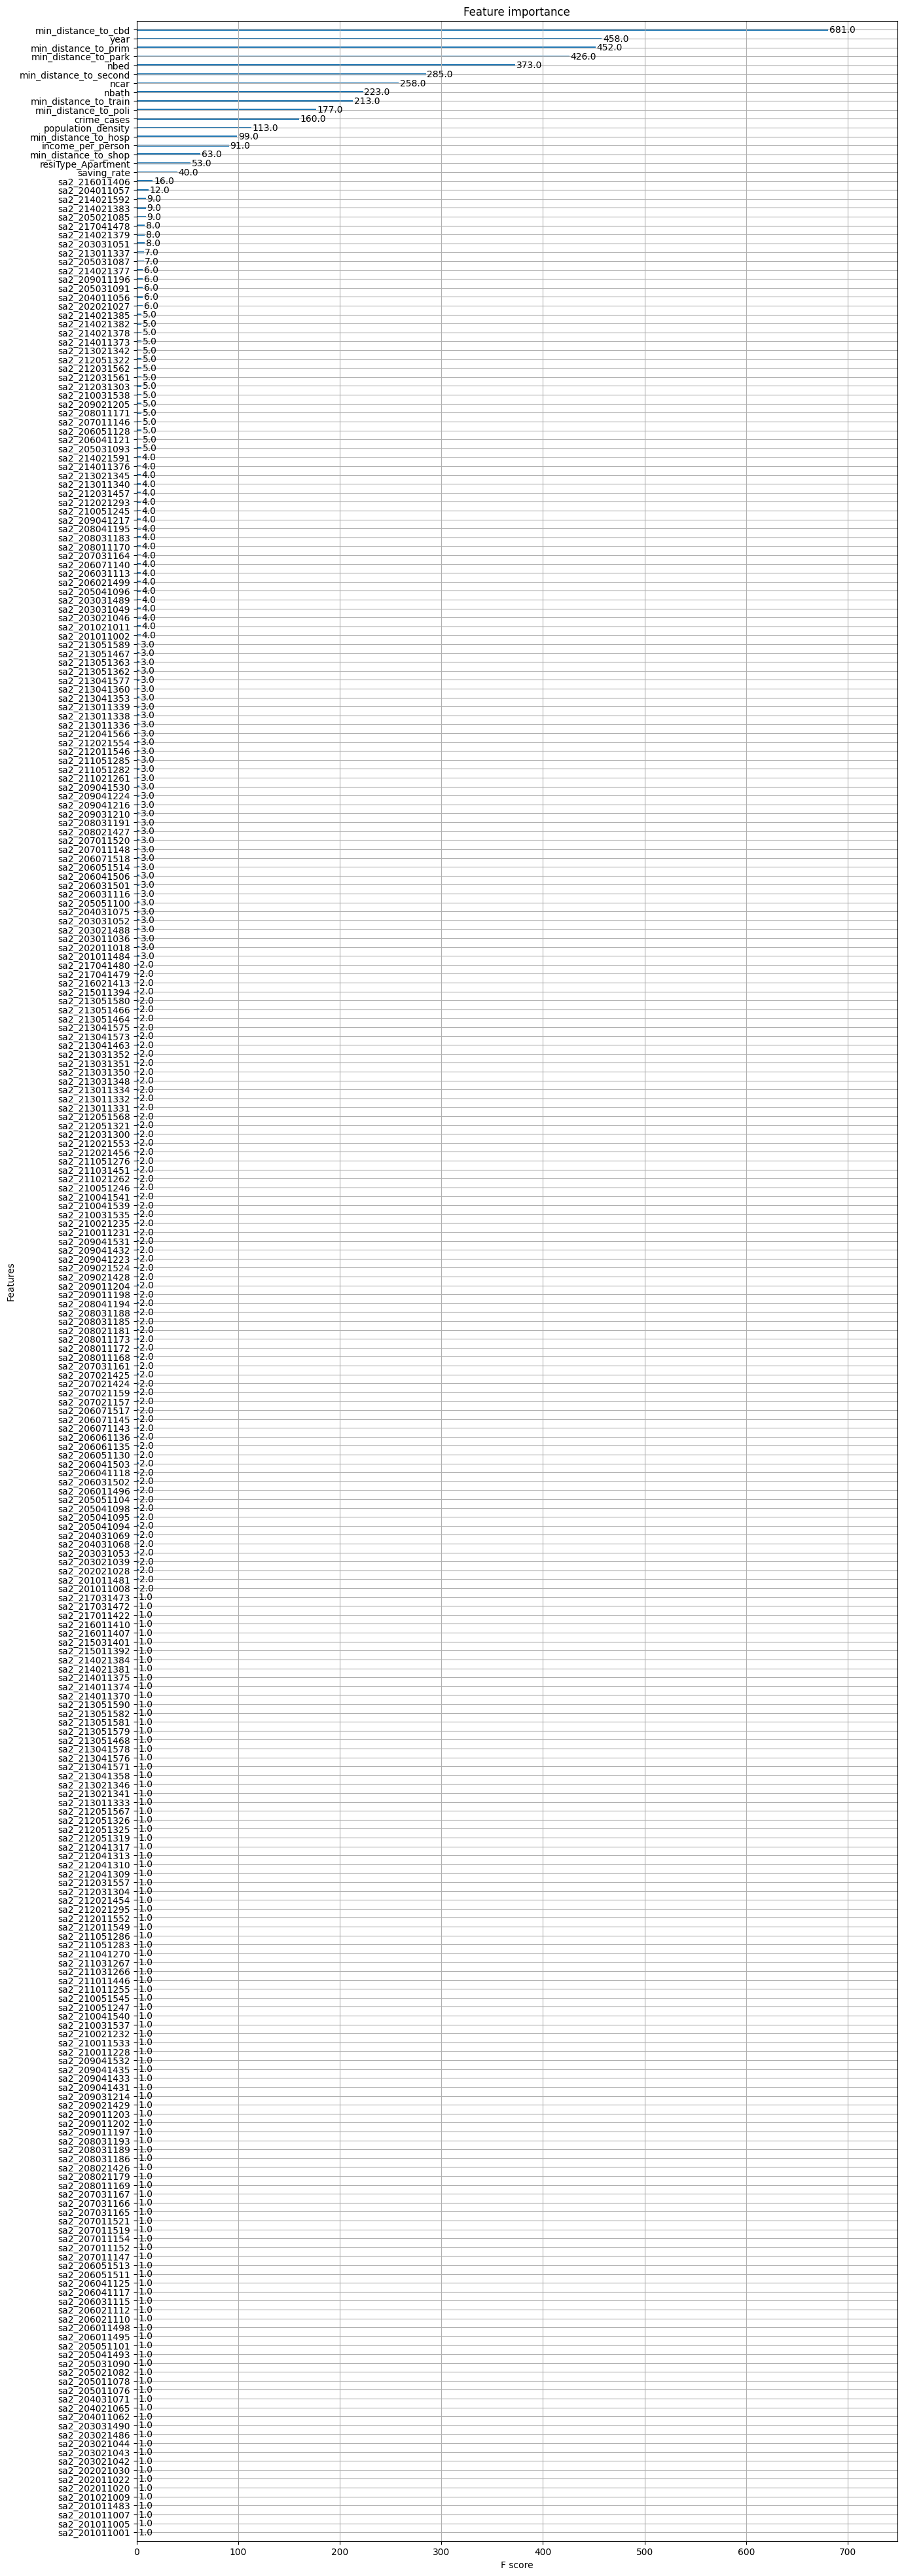

In [54]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig = plt.figure(figsize=(15, 50))
ax = fig.add_subplot(1, 1, 1)

plot_importance(model, ax=ax)

fig.savefig('../models/xgboost_feature_importance.png')
plt.show()

In [55]:
# calculate the R-square of the XGBoost regression model
print('Accuracy of xgboost regression model on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of xgboost regression model on test set: 0.58


In [14]:
# use the XGBoost regression model the preidct the test data
#pred_y = model.predict(X_test)

In [17]:
# calculate the MSE for the XGBoost regression model
errors = np.array(pred_y - y_test)
squared_errors = errors**2
mean_squared_error = squared_errors.mean()
mean_squared_error

17977.93979309857